<a href="https://colab.research.google.com/github/PavelSlobodianski/VisionTransformer-PyTorch/blob/main/LifeStyle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is just a draft of idea. The goal now for us is to identify if the approach suitable, or do we need completely different approach. Or what and how should be changed? ( I think that even if to not consider product specific details, and just use generic aggegated names as Cow Milk or Candy, then the approach conceptually will stay the same )

**Open Food Dataset**

In [1]:
from google.colab import files

# This will prompt you to select a file to upload
uploaded = files.upload()

# After upload, save kaggle.json to the proper location
import shutil
import os

if 'kaggle.json' in uploaded:
    os.makedirs('/root/.kaggle', exist_ok=True)
    shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
    os.chmod('/root/.kaggle/kaggle.json', 0o600)
    print("kaggle.json uploaded and permissions set!")
else:
    print("Please upload kaggle.json file.")



Saving kaggle.json to kaggle.json
kaggle.json uploaded and permissions set!


In [2]:
# Download the dataset
!kaggle datasets download -d openfoodfacts/world-food-facts --unzip -p ./data


Dataset URL: https://www.kaggle.com/datasets/openfoodfacts/world-food-facts
License(s): DbCL-1.0
  0% 0.00/109M [00:00<?, ?B/s]
100% 109M/109M [00:00<00:00, 1.32GB/s]


In [3]:
# 3. Check the exact filename
!ls data



en.openfoodfacts.org.products.tsv


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/en.openfoodfacts.org.products.tsv", sep="\t", low_memory=False)

# Preview the structure
print(f"Shape: {df.shape}")
df.head()


Shape: (356027, 163)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# List all column names
df.columns.tolist()


['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=8f1dc0908d5942e0946f1af09daaa15c5ea180566e76fbdc485a7dba56c0cce8
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfra

**Extract only Column Categories and those that are in English**

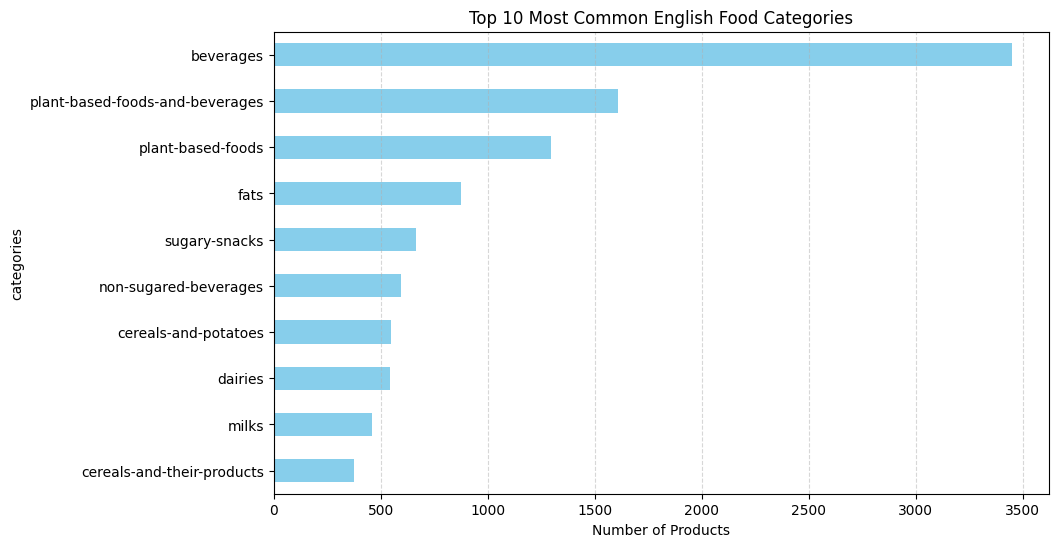

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract and explode the 'categories' column
raw_categories = (
    df['categories']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

# Step 2: Filter for only English-prefixed categories
english_categories = raw_categories[raw_categories.str.startswith('en:')]

# Step 3: Remove 'en:' prefix for readability
english_categories = english_categories.str.replace('en:', '', regex=False)

# Step 4: Count and plot
category_counts = english_categories.value_counts().head(10)

# Step 5: Plot
category_counts.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 10 Most Common English Food Categories")
plt.xlabel("Number of Products")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


In [7]:
import pandas as pd

# Step 1: Identify rows with English categories
df['has_en_category'] = df['categories'].fillna('').str.contains(r'\ben:', regex=True)

# Step 2: Total count of English-category products globally
total_en_products = df['has_en_category'].sum()
print(f"✅ Total products with English categories: {total_en_products:,}")

# Step 3: Count by country
en_by_country = (
    df[df['has_en_category']]
    .groupby('countries_en')['product_name']
    .count()
    .sort_values(ascending=False)
)

# Display top countries
print("\n🌍 English-Category Product Counts by Country:")
print(en_by_country.head(10))


✅ Total products with English categories: 8,993

🌍 English-Category Product Counts by Country:
countries_en
France                   7859
Germany                   206
Russia                    157
France,Switzerland        150
Belgium,France             86
United Kingdom             61
France,United Kingdom      40
France,United States       29
Romania                    26
France,fr:Deutschland      24
Name: product_name, dtype: int64


In [8]:
# Filter English categories
english_df = df[df['categories'].fillna('').str.contains(r'\ben:', regex=True)].copy()

# Explode and clean categories
english_df['categories'] = english_df['categories'].str.split(',')
english_df = english_df.explode('categories')
english_df['categories'] = english_df['categories'].str.strip()
english_df = english_df[english_df['categories'].str.startswith('en:')]
english_df['clean_category'] = english_df['categories'].str.replace('en:', '', regex=False).str.strip()

# --- Top 10 English categories by product count ---
top10_categories = english_df['clean_category'].value_counts().head(10)
print("Top 10 English Categories Worldwide:")
print(top10_categories)

print("\n" + "="*50 + "\n")

# --- Top 30 product items worldwide (all products) ---
top30_products = (
    df['product_name']
    .dropna()
    .str.strip()
    .value_counts()
    .head(30)
)

print("Top 30 Product Items Worldwide:")
print(top30_products)


Top 10 English Categories Worldwide:
clean_category
beverages                          3449
plant-based-foods-and-beverages    1608
plant-based-foods                  1297
fats                                877
sugary-snacks                       666
non-sugared-beverages               594
cereals-and-potatoes                549
dairies                             542
milks                               459
cereals-and-their-products          374
Name: count, dtype: int64


Top 30 Product Items Worldwide:
product_name
Ice Cream                 411
Extra Virgin Olive Oil    303
Potato Chips              281
Premium Ice Cream         226
Tomato Ketchup            195
Beef Jerky                167
Pinto Beans               162
Cookies                   161
Popcorn                   160
Spaghetti                 150
Salsa                     149
Tomato Sauce              141
Cut Green Beans           140
Black Beans               133
Creamy Peanut Butter      132
Mayonnaise               

**MRIO**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!ls /content/drive/MyDrive/Sustainability/

2021.zarr  2022.zarr  D_outputs  Environmental_Results	Indicator_0.csv


In [11]:
base_dir = "/content/drive/MyDrive/Sustainability"


In [12]:
!pip uninstall -y cupy cupy-cuda11x cupy-cuda12x

Found existing installation: cupy-cuda12x 13.3.0
Uninstalling cupy-cuda12x-13.3.0:
  Successfully uninstalled cupy-cuda12x-13.3.0


In [13]:
!pip cache purge

Files removed: 0


In [14]:
!pip install -q cupy-cuda12x


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 MB 23.3 MB/s eta 0:00:00


In [15]:
!pip install zarr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.4/205.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 5.2 MB/s eta 0:00:00


In [16]:
import cupy as cp

if cp.cuda.is_available():
    backend = 'cupy'
    xp = cp
    device_name = cp.cuda.runtime.getDeviceProperties(0)['name'].decode()
    print(f"✅ Using GPU: {device_name}")
else:
    raise RuntimeError("❌ GPU is not available.")

✅ Using GPU: NVIDIA A100-SXM4-40GB


In [17]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve


In [18]:
import os
import zarr
import numpy as np
from tqdm import tqdm
from scipy.linalg import solve
from numcodecs import Blosc
import cupy as cp

# Check for GPU and set backend accordingly
if cp.cuda.is_available():
    backend = 'cupy'
    xp = cp
    gpu_name = cp.cuda.runtime.getDeviceProperties(0)['name'].decode()
    print(f"✅ GPU detected: {gpu_name}")
else:
    raise RuntimeError("❌ No GPU available. Please run on a GPU-enabled environment.")

class EnvironmentalInputOutputModel:
    def __init__(self, data_path):
        self.store = zarr.open(data_path, mode='r')
        self._extract_data()

    def _extract_data(self):
        # Original shapes from zarr store
        self.transactions = self.store["T"][:]   # (189,163,189,163)
        self.final_demand = self.store["Y"][:]  # (189,163,189)
        self.environmental_factors = self.store["Q"][:]  # (18,189,163)

        # Dimensions
        self.num_regions = 189
        self.num_sectors = 163
        self.total_units = self.num_regions * self.num_sectors
        self.num_env_indicators = self.environmental_factors.shape[0]

        # Flatten & transfer to GPU arrays
        self.Z_matrix = xp.asarray(self.transactions.reshape(self.total_units, self.total_units))
        self.Y_vector = xp.asarray(self.final_demand.reshape(self.total_units, self.num_regions).sum(axis=1))
        self.Q_matrix = xp.asarray(self.environmental_factors.reshape(self.num_env_indicators, self.total_units))

    def calculate_leontief_inverse(self):
        """
        Calculate the Leontief inverse matrix L = (I - A)^-1
        where A = Z / x with x = Z.sum(axis=1) + y
        """
        x = self.Z_matrix.sum(axis=1) + self.Y_vector
        x = xp.where(x <= 0, xp.inf, x)
        A = self.Z_matrix / x[:, None]
        A = xp.where(xp.isnan(A) | xp.isinf(A), 0, A)
        I = xp.eye(self.total_units)
        B = I - A

        # Move to CPU for scipy.linalg.solve since CuPy's solve may not be available
        B_cpu = cp.asnumpy(B)
        y_cpu = cp.asnumpy(self.Y_vector)
        L = solve(B_cpu, y_cpu)
        return L, x

    def compute_environmental_impact(self, output_path, batch=512):
        """
        Computes the environmental impact matrix D = S * L
        where S = Q / x and L is Leontief inverse times y
        Stores the output as a zarr dataset with compression
        """
        L_y, x = self.calculate_leontief_inverse()

        # Transfer environmental factors and x to CPU for batch operations
        Q_cpu = cp.asnumpy(self.Q_matrix)
        x_cpu = cp.asnumpy(x)

        # Normalize environmental factors
        S = Q_cpu / x_cpu[None, :]
        S = np.nan_to_num(S, nan=0, posinf=0, neginf=0)

        # Prepare zarr output store
        zarr_out = zarr.open(output_path, mode="w", zarr_version=2)
        dataset = zarr_out.create_dataset(
            name="Environmental_Impact_3D",
            shape=(self.num_env_indicators, self.total_units, self.total_units),
            chunks=(1, batch, self.total_units),
            dtype="float32",
            compressor=Blosc(cname="zstd", clevel=5),
            overwrite=True
        )

        # Batch-wise calculation and storage to save memory
        for env_idx in tqdm(range(self.num_env_indicators), desc="Calculating environmental impact", unit="indicator"):
            impact_vector = S[env_idx]
            impact_vector = np.nan_to_num(impact_vector)

            for start_idx in range(0, self.total_units, batch):
                end_idx = min(start_idx + batch, self.total_units)
                block = impact_vector[start_idx:end_idx, None] * L_y[None, :]
                dataset[env_idx, start_idx:end_idx, :] = block.astype(np.float32)

        print(f"✅ Environmental impact matrix saved to: {output_path}")

    def compute_additional_metrics(self):
        """
        Example additional calculation:
        - Calculate sectoral intensities (env impact per unit output)
        - Calculate total environmental footprint per region
        """
        # Total output vector x
        x = self.Z_matrix.sum(axis=1) + self.Y_vector

        # Environmental intensities (Q / total output)
        env_intensity = self.Q_matrix / x[None, :]
        env_intensity = xp.where(xp.isnan(env_intensity) | xp.isinf(env_intensity), 0, env_intensity)

        # Aggregate by region: sum intensities across sectors within each region
        reshaped_intensity = env_intensity.reshape(self.num_env_indicators, self.num_regions, self.num_sectors)
        total_region_intensity = xp.sum(reshaped_intensity, axis=2)

        return xp.asnumpy(env_intensity), xp.asnumpy(total_region_intensity)


✅ GPU detected: NVIDIA A100-SXM4-40GB


This is working, but I have to run this cell again ( takes 45 min ), so I run it only when necessary

In [47]:
import multiprocessing as mp

def run_processing_for_year(year, base_dir, output_dir):
    input_path = os.path.join(base_dir, f"{year}.zarr")
    output_path = os.path.join(output_dir, f"Environmental_Impact_{year}.zarr")

    model = EnvironmentalInputOutputModel(input_path)
    model.compute_environmental_impact(output_path)

if __name__ == "__main__":
    base_directory = "/content/drive/MyDrive/Sustainability"
    out_directory = os.path.join(base_directory, "Environmental_Results")
    os.makedirs(out_directory, exist_ok=True)

    years_to_process = list(range(2021, 2022))

    # Simple serial processing for demo; can be replaced with multiprocessing if CPU-bound
    for yr in years_to_process:
        run_processing_for_year(yr, base_directory, out_directory)

KeyboardInterrupt: 

In [20]:
import zarr

# Path to your saved output zarr
output_path = "/content/drive/MyDrive/Sustainability/Environmental_Results/Environmental_Impact_2021.zarr"

# Open the Zarr store
z_out = zarr.open(output_path, mode='r')

# Inspect available datasets
print("Datasets inside the zarr:", list(z_out.keys()))
# Should print: ['Environmental_Impact_3D']

# Access the 3D dataset
env_impact = z_out["Environmental_Impact_3D"]

# Check the shape
print("Shape of Environmental_Impact_3D:", env_impact.shape)
# e.g. (num_env_indicators, total_units, total_units)

# Let's say you want to see the first 10 rows of the first environmental indicator (index 0)
first_indicator_matrix = env_impact[0]  # shape: (total_units, total_units)

# Print shape
print("Shape of first indicator matrix:", first_indicator_matrix.shape)

# Now, print the first 10 rows and first 10 columns (for compactness)
print("First 10 rows and columns of the first environmental indicator matrix:")
print(first_indicator_matrix[:10, :10])


Datasets inside the zarr: ['Environmental_Impact_3D']
Shape of Environmental_Impact_3D: (19, 30807, 30807)
Shape of first indicator matrix: (30807, 30807)
First 10 rows and columns of the first environmental indicator matrix:
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.6403453e+05 1.7500764e+05 4.7116574e+04 2.6951353e+05
  2.6380653e+05 3.3597866e+05 1.7580789e+05 1.1314181e+05 7.9125031e+04]
 [0.0000000e+00 1.7564892e+05 1.8739900e+05 5.0452645e+04 2.8859634e+05
  2.8248528e+05 3.5976750e+05 1.8825589e+05 1.2115277e+05 8.4727453e+04]
 [0.0000000e+00 6.9804375e+04 7.4473953e+04 2.0050311e+04 1.1469064e+05
  1.1226205e+05 1.4297466e+05 7.4814492e+04 4.8147145e+04 3.3671410e+04]
 [0.0000000e+00 1.4111247e+05 1.5055220e+05 4.0532539e+04 2.3185192e+05
  2.2694242e+05 2.8902925e+05 1.5124062e+05 9.7331461e+04 6.8068164e+04]
 [0.0000000e+00 1.5888420e+06 1.6951279e+06 4.563

In [21]:
# Properly filter and create a new DataFrame to avoid the warning
df = df[df['categories'].str.contains('en:', na=False)].copy()

# Now it's safe to modify the DataFrame
df['product_name'] = df['product_name'].fillna('')
df['categories'] = df['categories'].fillna('')

# Combine for classification input
df['input_text'] = df['product_name'] + ' ' + df['categories']



**Assign CPC Descriptions to product texts (as for now I have done it for only a couple of CPC Descriptions, but will need to be done all possible)**





In [22]:
import pandas as pd

cpc_to_mrio_df = pd.DataFrame({
    "CPC Code": ["211","221","231","235","241","239","222","291","243","242"],
    "CPC Description": [
        "Meat of animals","Fish and other seafood","Dairy products","Bakery products",
        "Beverages","Other food products n.e.c.","Vegetables",
        "Prepared food products","Alcoholic beverages","Non-alcoholic beverages"
    ],
    "MRIO Sector Code": [
        "food_meat","food_fish","food_dairy","food_bakery","food_bev",
        "food_other","food_veg","food_prepared","food_alcohol","food_soft"
    ]
})


**Use zero-shot classification** Classify each product text to the closest CPC description from the candidate labels (like "Meat of animals"). It can be easily done via CaML (just to store the pretrained model checkpoint to use it)

In [23]:
from transformers import pipeline
from tqdm import tqdm

# Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
candidate_labels = cpc_to_mrio_df["CPC Description"].tolist()

# Predict CPC code using description
def classify_product(text):
    try:
        result = classifier(text, candidate_labels, multi_label=False)
        best_label = result['labels'][0]
        return best_label
    except Exception as e:
        print(f"Error on text: {text[:50]}... -> {e}")
        return None

# Run for a sample of the dataset to test
df_sample = df.sample(500, random_state=42)  # You can expand later
df_sample['CPC Description'] = [classify_product(text) for text in tqdm(df_sample['input_text'])]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 500/500 [01:38<00:00,  5.10it/s]


Merge the resulting CPC Description back to MRIO codes

In [24]:
df_merged = df_sample.merge(cpc_to_mrio_df, on='CPC Description', how='left')

# View result
df_merged[['product_name', 'categories', 'CPC Description', 'MRIO Sector Code']].head(20)


,product_name,categories,CPC Description,MRIO Sector Code
0,Kronenbourg,en:beverages,Beverages,food_bev
1,Lait,"en:dairies, en:milks",Dairy products,food_dairy
2,Chips saveur sel et vinaigre,"en:salty-snacks, en:appetizers, en:chips-and-f...",Prepared food products,food_prepared
3,Madeleines de Liverdun à la mirabelle,"en:sugary-snacks, en:biscuits-and-cakes, en:de...",Prepared food products,food_prepared
4,Delical,en:beverages,Beverages,food_bev
5,Velouté Légumes Variés,"en:plant-based-foods-and-beverages, en:plant-b...",Vegetables,food_veg
6,Sel au Céleri,"en:groceries, en:condiments",Prepared food products,food_prepared
7,Brillat savarin affiné,"en:dairies, en:cheeses, en:cow-cheeses, en:sof...",Dairy products,food_dairy
8,Sirop de Mandarine Cédrat,"en:sweeteners, en:syrups, en:simple-syrups, en...",Beverages,food_bev
9,Jus D'orange,en:beverages,Beverages,food_bev


In [32]:
!pip install fuzzywuzzy[speedup]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 95.9 MB/s eta 0:00:00


We now need to Assign Environmental Coefficients
•	From WFLDB, extract process-LCA coefficients for relevant food items/sectors (e.g., land use, CO₂)
•	These coefficients form a micro-scale environmental extension vector/matrix (C_process). **However, there is bad data in WFLDB, we can later join different tables to extract process-LCA coefficients, as for now I used just a simulation**


In [37]:
import pandas as pd
import numpy as np

# Simulate a small sample of products
products = [
    'Wheat', 'Beef', 'Milk', 'Chicken', 'Rice', 'Soybeans', 'Pork', 'Eggs', 'Potatoes', 'Fish'
]

np.random.seed(42)  # for reproducibility

# Simulated data columns
production_qty = np.random.uniform(1e5, 1e7, size=len(products))  # in kg or tonnes
co2_per_kg = np.random.uniform(0.5, 60, size=len(products))      # kg CO2 per kg product
price_per_kg = np.random.uniform(0.5, 5, size=len(products))     # price in USD per kg

# Build DataFrame
env_df = pd.DataFrame({
    'product_name': products,
    'production_qty': production_qty,
    'co2_per_kg': co2_per_kg,
    'price_per_kg': price_per_kg
})

print(env_df)


  product_name  production_qty  co2_per_kg  price_per_kg
0        Wheat    3.807947e+06    1.724777      3.253338
1         Beef    9.512072e+06   58.209636      1.127722
2         Milk    7.346740e+06   50.030337      1.814651
3      Chicken    6.026719e+06   13.134177      2.148628
4         Rice    1.644585e+06   11.318586      2.552315
5     Soybeans    1.644346e+06   11.412568      4.033292
6         Pork    6.750278e+05   18.602413      1.398532
7         Eggs    8.675144e+06   31.723008      2.814055
8     Potatoes    6.051039e+06   26.200729      3.165866
9         Fish    7.109919e+06   17.828134      0.709027


What have been done above (summarized):
1. Map Food Products to Industries:
•	Use Open Food Facts product descriptions
•	Apply CaML to link product text → CPC industry codes
•	Use CPC correspondence table to align with EXIOBASE sectors
2. (Partially as form of simulation):  Assign Environmental Coefficients
•	From WFLDB, extract process-LCA coefficients for relevant food items/sectors (e.g., land use, CO₂)
•	These coefficients form a micro-scale environmental extension vector/matrix (C_process)

**The Next Steps**
3. Hybridization & Cut-Off Matrix Construction:
Start with EXIOBASE's technical coefficients matrix A and environmental satellite matrix (for footprints)
•	Cut-off matrix C_u constructed per STAM methodology (Jakobs et al.):	C_u identifies and removes overlapping upstream emissions that appear both in process LCA and MRIO data prevents double counting by zeroing out duplicate flows
•	This modifies the extended MRIO system:[I-A, C_u]
•	C_u zeroes out parts of the EXIOBASE technical coefficient matrix A that overlap with the process-LCA system.That is - Prevents double counting when integrating micro (process) LCA data with macro (MRIO).
4. Replace/Integrate Micro-scale Coefficients:
•	Substitute sectors/products in EXIOBASE satellite accounts with process LCA data from WFLDB
•	This replaces lower resolution or aggregated MRIO coefficients where micro data is better.
5. Recompute Leontief Inverse








In [49]:
# Display the public key
!ssh-keygen -t ed25519 -C "pavel.slobodianskii@gmail.com" -f /root/.ssh/id_ed25519 -N ""


Generating public/private ed25519 key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:DpX/hsj0Y+dd+1UgLlO+Ecud4yKa0hP9qslTFg9e76Q pavel.slobodianskii@gmail.com
The key's randomart image is:
+--[ED25519 256]--+
|                 |
|         .       |
|        o   + .  |
|       . .o=.= o |
|      . So+=*.+ .|
|       =.o==.+o..|
|       .++*.*+. o|
|      ..+= *Eo..o|
|       .*+... ..o|
+----[SHA256]-----+


In [50]:
!cat /root/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIG2pIk/vczgBGoQYp9dUv9FDGOsEHtDheUEafiC9SScz pavel.slobodianskii@gmail.com


In [51]:
!echo -e "Host gitlab.com\n\tHostName gitlab.com\n\tUser git\n\tIdentityFile /root/.ssh/id_ed25519\n\tStrictHostKeyChecking no" > /root/.ssh/config

In [54]:
!ssh -T git@gitlab.com

Welcome to GitLab, @pavel.slobodianskii!


In [55]:
!mkdir -p /root/.ssh
!chmod 700 /root/.ssh
!ssh-keyscan gitlab.com >> /root/.ssh/known_hosts
!chmod 644 /root/.ssh/known_hosts

!git config --global user.name "Pavel Slobodianskii"
!git config --global user.email "pavel.slobodianskii@gmail.com"


# gitlab.com:22 SSH-2.0-GitLab-SSHD
# gitlab.com:22 SSH-2.0-GitLab-SSHD
# gitlab.com:22 SSH-2.0-GitLab-SSHD
# gitlab.com:22 SSH-2.0-GitLab-SSHD
# gitlab.com:22 SSH-2.0-GitLab-SSHD


In [56]:
# Set SSH repo and clone directory
REPO_SSH = "git@gitlab.com:pavel.slobodianskii/llm-for-sustanability.git"
CLONE_DIR = "/content/llm-repo"

# Clone the repo into Colab
!git clone {REPO_SSH} {CLONE_DIR}

# Move into the repo directory
%cd {CLONE_DIR}


Cloning into '/content/llm-repo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12 (delta 2), reused 1 (delta 1), pack-reused 9 (from 1)
Receiving objects: 100% (12/12), 4.36 KiB | 4.36 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/llm-repo


In [57]:
!git config --global user.email "pavel.slobodianskii@gmail.com"
!git config --global user.name "Pavel Slobodianskii"


In [67]:
import os

file_path = "LifeStyle_2.ipynb"
print("Exists:", os.path.exists(file_path))



Exists: False


In [62]:
NOTEBOOK_PATH = "/content/LifeStyle_2.ipynb"      # Make sure this notebook exists
CLONE_DIR = "/content/llm_repo"                   # This is your cloned GitLab repo



In [63]:
!ls /content


data  drive  faostat_data  llm-repo  production_impacts.csv  sample_data


In [64]:
!cp {NOTEBOOK_PATH} {CLONE_DIR}


cp: cannot stat '/content/LifeStyle_2.ipynb': No such file or directory
